In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
from datetime import datetime


In [11]:
Pop_TimeSeries=pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/Deep learning/LSTM/POP.csv')


In [5]:
Pop_TimeSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
realtime_start    816 non-null object
value             816 non-null float64
date              816 non-null object
realtime_end      816 non-null object
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


In [13]:
PopH_TimeSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
realtime_start    100 non-null object
value             100 non-null int64
date              100 non-null object
realtime_end      100 non-null object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [6]:
Pop_TimeSeries.isnull().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [17]:
Pop_TimeSeries.drop(labels=['realtime_start','realtime_end'], axis=1, inplace =True)

In [20]:
Pop_TimeSeries.dropna()

,value,date
0,156309.000,1952-01-01
1,156527.000,1952-02-01
2,156731.000,1952-03-01
3,156943.000,1952-04-01
4,157140.000,1952-05-01
...,...,...
811,329591.333,2019-08-01
812,329785.872,2019-09-01
813,329982.035,2019-10-01
814,330154.949,2019-11-01


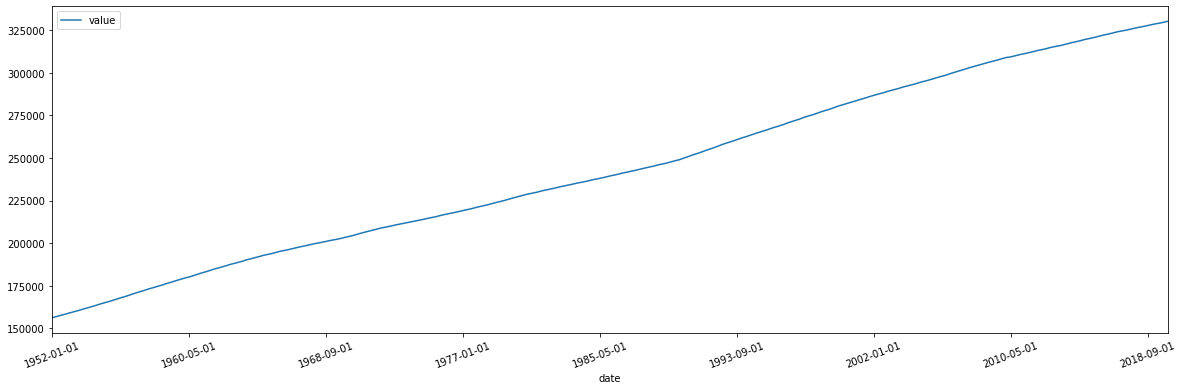

In [21]:
%matplotlib inline
Pop_TimeSeries.plot(x='date', y='value', kind='line', figsize=(20,6), rot=20)

In [29]:
Fulldata=Pop_TimeSeries[['value']].values
Fulldata[0:5]

array([[156309.],
       [156527.],
       [156731.],
       [156943.],
       [157140.]])

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


Minmaxscaler= MinMaxScaler()

DataScaler = Minmaxscaler.fit(Fulldata)
X=DataScaler.transform(Fulldata)


In [52]:
X[0:10]

array([[0.        ],
       [0.00125287],
       [0.00242527],
       [0.00364366],
       [0.00477584],
       [0.0059425 ],
       [0.00714939],
       [0.00855742],
       [0.01002293],
       [0.01147695]])

In [67]:
X_samples = list()
y_samples = list()

NoRows=len(X)
print(NoRows)
TimeSteps=10


816


In [68]:
for i in range(TimeSteps , NoRows , 1):
    print('*'*60)
    x_sample = X[i-TimeSteps:i]
    print(i-TimeSteps)
    print(' x_sample' ,x_sample)
    y_sample = X[i]
    print(' y_sample' ,y_sample)
    #print(i-TimeSteps)
    #print(len(y_sample))
    #print(i)
    X_samples.append(x_sample)
    y_samples.append(y_sample)

************************************************************
0
 x_sample [[0.        ]
 [0.00125287]
 [0.00242527]
 [0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]]
 y_sample [0.01231028]
************************************************************
1
 x_sample [[0.00125287]
 [0.00242527]
 [0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]
 [0.01231028]]
 y_sample [0.01406889]
************************************************************
2
 x_sample [[0.00242527]
 [0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]
 [0.01231028]
 [0.01406889]]
 y_sample [0.01531026]
************************************************************
3
 x_sample [[0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]
 [0.01231028]
 [0.01406889]
 [0.01531026]]
 y_sample [0.01644244]
****************************************************

 x_sample [[0.15736696]
 [0.15890143]
 [0.16053936]
 [0.16215429]
 [0.16364279]
 [0.16498186]
 [0.16628071]
 [0.1674876 ]
 [0.16862552]
 [0.16991287]]
 y_sample [0.171137]
************************************************************
115
 x_sample [[0.15890143]
 [0.16053936]
 [0.16215429]
 [0.16364279]
 [0.16498186]
 [0.16628071]
 [0.1674876 ]
 [0.16862552]
 [0.16991287]
 [0.171137  ]]
 y_sample [0.17244159]
************************************************************
116
 x_sample [[0.16053936]
 [0.16215429]
 [0.16364279]
 [0.16498186]
 [0.16628071]
 [0.1674876 ]
 [0.16862552]
 [0.16991287]
 [0.171137  ]
 [0.17244159]]
 y_sample [0.17372894]
************************************************************
117
 x_sample [[0.16215429]
 [0.16364279]
 [0.16498186]
 [0.16628071]
 [0.1674876 ]
 [0.16862552]
 [0.16991287]
 [0.171137  ]
 [0.17244159]
 [0.17372894]]
 y_sample [0.17517721]
************************************************************
118
 x_sample [[0.16364279]
 [0.16498186]
 [0.1662

 y_sample [0.35824518]
************************************************************
288
 x_sample [[0.34934293]
 [0.35022798]
 [0.3509866 ]
 [0.35183142]
 [0.35273371]
 [0.3537452 ]
 [0.3547452 ]
 [0.35588312]
 [0.35707277]
 [0.35824518]]
 y_sample [0.35933713]
************************************************************
289
 x_sample [[0.35022798]
 [0.3509866 ]
 [0.35183142]
 [0.35273371]
 [0.3537452 ]
 [0.3547452 ]
 [0.35588312]
 [0.35707277]
 [0.35824518]
 [0.35933713]]
 y_sample [0.36032563]
************************************************************
290
 x_sample [[0.3509866 ]
 [0.35183142]
 [0.35273371]
 [0.3537452 ]
 [0.3547452 ]
 [0.35588312]
 [0.35707277]
 [0.35824518]
 [0.35933713]
 [0.36032563]]
 y_sample [0.36131987]
************************************************************
291
 x_sample [[0.35183142]
 [0.35273371]
 [0.3537452 ]
 [0.3547452 ]
 [0.35588312]
 [0.35707277]
 [0.35824518]
 [0.35933713]
 [0.36032563]
 [0.36131987]]
 y_sample [0.36226815]
*********************

 x_sample [[0.47699741]
 [0.47797441]
 [0.4788997 ]
 [0.47976176]
 [0.48056635]
 [0.48152037]
 [0.48253761]
 [0.48361806]
 [0.4847215 ]
 [0.48588816]]
 y_sample [0.48711804]
************************************************************
407
 x_sample [[0.47797441]
 [0.4788997 ]
 [0.47976176]
 [0.48056635]
 [0.48152037]
 [0.48253761]
 [0.48361806]
 [0.4847215 ]
 [0.48588816]
 [0.48711804]]
 y_sample [0.48830194]
************************************************************
408
 x_sample [[0.4788997 ]
 [0.47976176]
 [0.48056635]
 [0.48152037]
 [0.48253761]
 [0.48361806]
 [0.4847215 ]
 [0.48588816]
 [0.48711804]
 [0.48830194]]
 y_sample [0.48941113]
************************************************************
409
 x_sample [[0.47976176]
 [0.48056635]
 [0.48152037]
 [0.48253761]
 [0.48361806]
 [0.4847215 ]
 [0.48588816]
 [0.48711804]
 [0.48830194]
 [0.48941113]]
 y_sample [0.49029044]
************************************************************
410
 x_sample [[0.48056635]
 [0.48152037]
 [0.48

 [0.7019617 ]]
 y_sample [0.70349043]
************************************************************
559
 x_sample [[0.69027786]
 [0.691979  ]
 [0.69363991]
 [0.69521461]
 [0.69664564]
 [0.69816287]
 [0.69932378]
 [0.70050769]
 [0.7019617 ]
 [0.70349043]]
 y_sample [0.7051226]
************************************************************
560
 x_sample [[0.691979  ]
 [0.69363991]
 [0.69521461]
 [0.69664564]
 [0.69816287]
 [0.69932378]
 [0.70050769]
 [0.7019617 ]
 [0.70349043]
 [0.7051226 ]]
 y_sample [0.70681225]
************************************************************
561
 x_sample [[0.69363991]
 [0.69521461]
 [0.69664564]
 [0.69816287]
 [0.69932378]
 [0.70050769]
 [0.7019617 ]
 [0.70349043]
 [0.7051226 ]
 [0.70681225]]
 y_sample [0.70857661]
************************************************************
562
 x_sample [[0.69521461]
 [0.69664564]
 [0.69816287]
 [0.69932378]
 [0.70050769]
 [0.7019617 ]
 [0.70349043]
 [0.7051226 ]
 [0.70681225]
 [0.70857661]]
 y_sample [0.71030648]
*******

 [0.92109457]]
 y_sample [0.92239226]
************************************************************
731
 x_sample [[0.91334993]
 [0.91425132]
 [0.91500159]
 [0.91581815]
 [0.91671257]
 [0.91766544]
 [0.91874237]
 [0.91982131]
 [0.92109457]
 [0.92239226]]
 y_sample [0.92363446]
************************************************************
732
 x_sample [[0.91425132]
 [0.91500159]
 [0.91581815]
 [0.91671257]
 [0.91766544]
 [0.91874237]
 [0.91982131]
 [0.92109457]
 [0.92239226]
 [0.92363446]]
 y_sample [0.92481696]
************************************************************
733
 x_sample [[0.91500159]
 [0.91581815]
 [0.91671257]
 [0.91766544]
 [0.91874237]
 [0.91982131]
 [0.92109457]
 [0.92239226]
 [0.92363446]
 [0.92481696]]
 y_sample [0.9258717]
************************************************************
734
 x_sample [[0.91581815]
 [0.91671257]
 [0.91766544]
 [0.91874237]
 [0.91982131]
 [0.92109457]
 [0.92239226]
 [0.92363446]
 [0.92481696]
 [0.9258717 ]]
 y_sample [0.92691981]
*******

In [69]:
print(len(X_samples))
print(len(y_samples))

806
806


In [70]:
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
X_data.shape

(806, 10, 1)

In [71]:
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
y_data.shape

(806, 1)

In [72]:
# Splitting the data into train and test

TestingRecords=10

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [73]:
# Printing the shape of training and testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(796, 10, 1)
(796, 1)
(10, 10, 1)
(10, 1)


In [75]:
for inp, out in zip(X_train[0:20], y_train[0:20]):
    print(inp,'-->', out)

[[0.        ]
 [0.00125287]
 [0.00242527]
 [0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]] --> [0.01231028]
[[0.00125287]
 [0.00242527]
 [0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]
 [0.01231028]] --> [0.01406889]
[[0.00242527]
 [0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]
 [0.01231028]
 [0.01406889]] --> [0.01531026]
[[0.00364366]
 [0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]
 [0.01231028]
 [0.01406889]
 [0.01531026]] --> [0.01644244]
[[0.00477584]
 [0.0059425 ]
 [0.00714939]
 [0.00855742]
 [0.01002293]
 [0.01147695]
 [0.01231028]
 [0.01406889]
 [0.01531026]
 [0.01644244]] --> [0.01747117]


In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, activation = 'relu', input_shape = (10, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [78]:
np.set_printoptions(suppress=True)

In [91]:
regressor.fit(X_train, y_train, batch_size = 5, epochs = 5)


Epoch 1/5
796/796 [==============================] - 1s 1ms/step - loss: 0.0560
Epoch 2/5
796/796 [==============================] - 1s 709us/step - loss: 0.0052
Epoch 3/5
796/796 [==============================] - 1s 721us/step - loss: 5.5744e-04
Epoch 4/5
796/796 [==============================] - 1s 732us/step - loss: 2.1749e-05
Epoch 5/5
796/796 [==============================] - 1s 737us/step - loss: 3.1845e-06


In [92]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[328507.38],
       [328668.9 ],
       [328823.28],
       [328973.6 ],
       [329121.56],
       [329269.12],
       [329418.72],
       [329574.56],
       [329736.22],
       [329904.3 ]], dtype=float32)

In [93]:
orig=DataScaler.inverse_transform(y_test)
orig

array([[328742.843],
       [328890.25 ],
       [329047.319],
       [329213.989],
       [329394.993],
       [329591.333],
       [329785.872],
       [329982.035],
       [330154.949],
       [330309.946]])

In [94]:
# Accuracy of the predictions
100 - (100*(abs(orig-predicted_Price)/orig)).mean()

99.9054749140885

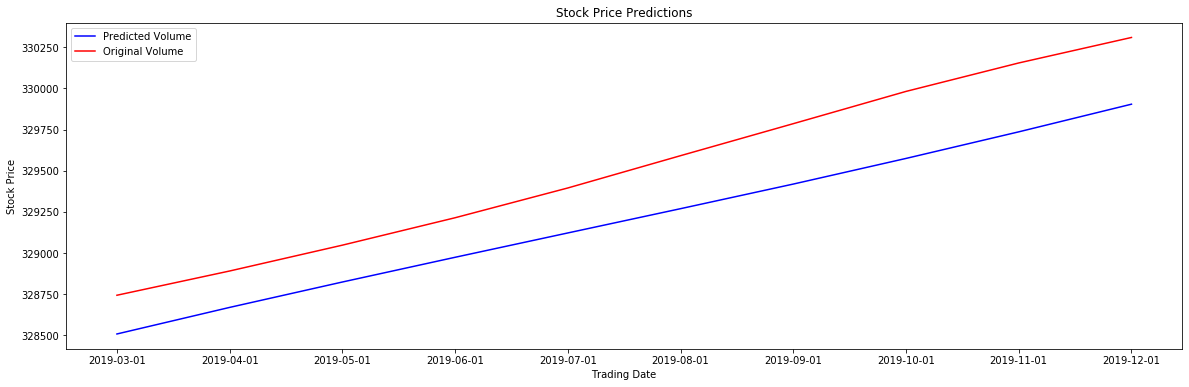

In [99]:
import matplotlib.pyplot as plt


plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'red', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(10), Pop_TimeSeries.tail(10)['date'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()